In [13]:
# import the modules we need. 

from pymatgen import Structure
import numpy as np

# polyhedral analysis: (https://github.com/bjmorgan/polyhedral-analysis/tree/main)
from polyhedral_analysis.configuration import Configuration
from polyhedral_analysis.octahedral_analysis import *
from polyhedral_analysis.polyhedra_recipe import PolyhedraRecipe

import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams["mathtext.fontset"] ='custom'
plt.rcParams['mathtext.rm'] = 'Helvetica'
plt.rcParams['mathtext.it'] = 'Helvetica:italic'
plt.rcParams['mathtext.bf'] = 'Helvetica'
plt.rcParams["font.size"] = "6"
plt.rcParams['axes.linewidth'] = 0.75
plt.rcParams['lines.linewidth'] = 0.75
plt.rcParams['lines.markersize'] = 4

In [14]:
# import the annealed low-energy Mn0.8O2 structure from the CE + MC simulations as s, 
# and the 'pristine-delithiated' structure (ribbon-superstructure, with Li removed)

path = "../Data/Data_thermodynamics/"

s = Structure.from_file(filename=f'{path}/Mn0.4O_n48000_MC.cif')
pristine_delith = Structure.from_file(filename=f'{path}/pristine_delithiated.cif')


In [15]:
# here we use polyhedral_analysis to analyse the coordination around each O atom to Mn
# up to a cutoff radius of 2.5 Å
recipe_O_Mn = PolyhedraRecipe( method='distance cutoff', 
                          coordination_cutoff=2.5, 
                          central_atoms='O',
                          vertex_atoms=['Mn'])

In [16]:
# Define a function that takes a pymatgen structure object and returns a list of the 
# fractional content of O–Mn_x polyhedra, where x = 0, 1, ... 6.

def get_O_envs(structure):
    
    # some empty lists to add our polyhedra to
    Mn0 = []
    Mn1 = []
    Mn2 = []
    Mn3 = []
    Mn4 = []
    Mn5 = []
    Mn6 = []

    # cycle through all the O polyhedra, and add them to the lists based on the number 
    # of Mn neighbours each central O atom has 
    config = Configuration( structure=structure, recipes=[recipe_O_Mn] )
    for p in config.polyhedra:
        if p.vertex_labels.count('Mn') == 0:
            Mn0.append(p)
        if p.vertex_labels.count('Mn') == 1:
            Mn1.append(p)   
        if p.vertex_labels.count('Mn') == 2:
            Mn2.append(p)  
        if p.vertex_labels.count('Mn') == 3:
            Mn3.append(p)
        if p.vertex_labels.count('Mn') == 4:
            Mn4.append(p)
        if p.vertex_labels.count('Mn') == 5:
            Mn5.append(p)
        if p.vertex_labels.count('Mn') == 6:
            Mn6.append(p)

    # total up, return fractions
    tot = len(Mn0)+len(Mn1)+len(Mn2)+len(Mn3)+len(Mn4)+len(Mn5)+len(Mn6)
    O_envs_frac = [len(Mn0)/tot,
                   len(Mn1)/tot,
                   len(Mn2)/tot,
                   len(Mn3)/tot,
                   len(Mn4)/tot,
                   len(Mn5)/tot,
                   len(Mn6)/tot]
    print(O_envs_frac)
    return O_envs_frac


O_envs_MC = get_O_envs(s)
O_envs_pristine_delith = get_O_envs(pristine_delith)

[0.1187037037037037, 0.13666666666666666, 0.2364814814814815, 0.37222222222222223, 0.11203703703703703, 0.021296296296296296, 0.0025925925925925925]
[0.0, 0.0, 0.6, 0.4, 0.0, 0.0, 0.0]


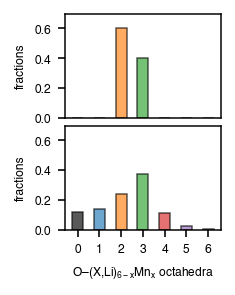

In [17]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(1.2, 1.5))

a = axes[0]
b = axes[1]

bar_colors = ['black','tab:blue','tab:orange','tab:green','tab:red', 'tab:purple',
              'tab:brown']

x = ['0','1','2','3','4','5','6']

N= len(x)
ind = np.arange(N) 
width = 0.5
linewidth = 0.75

a.bar(ind , O_envs_pristine_delith , width, color=bar_colors, alpha=0.65, edgecolor='k', linewidth = linewidth)
b.bar(ind , O_envs_MC , width, color=bar_colors, alpha=0.65, edgecolor='k', linewidth = linewidth)

b.set_xticks(ind)

b.set_xticklabels(x)

left_axes = [a, b]
for axis in left_axes:
    axis.set_yticks([])
    axis.set_ylim([0, 0.7])
    axis.set_ylabel('fractions')
    axis.set_yticks([0,0.2,0.4,0.6])
    
a.set_xticks([])
b.set_xlabel('O–($X$,Li)$_{6-x}$Mn$_x$ octahedra')


fig.subplots_adjust(bottom=0.0, top=1.0, left=0.0, right=0.9,
                    wspace=0.2, hspace=0.075)

#plt.savefig('Fig_3d_O_envs.svg', dpi=300, bbox_inches='tight')